In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 크기 출력
print("훈련 이미지 shape:", x_train.shape)  
print("테스트 이미지 shape:", x_test.shape)   
print("훈련 라벨 shape:", y_train.shape)    
print("테스트 라벨 shape:", y_test.shape)  

훈련 이미지 shape: (60000, 28, 28)
테스트 이미지 shape: (10000, 28, 28)
훈련 라벨 shape: (60000,)
테스트 라벨 shape: (10000,)


In [3]:
# 정규화 
x_train, x_test = x_train / 255.0, x_test / 255.0  
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:
# 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 학습 (히스토리 저장)
history = model.fit(
    x_train, y_train_cat,
    validation_split = 0.1,
    epochs = 5,
    batch_size = 32,
    verbose = 1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.4636 - val_accuracy: 0.9642 - val_loss: 0.1199
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9645 - loss: 0.1147 - val_accuracy: 0.9730 - val_loss: 0.0915
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0748 - val_accuracy: 0.9735 - val_loss: 0.0840
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9738 - val_loss: 0.0817
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9803 - val_loss: 0.0719


In [7]:
# 평가
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9730 - loss: 0.0894
Test Accuracy: 0.9767


In [8]:
# 예측
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


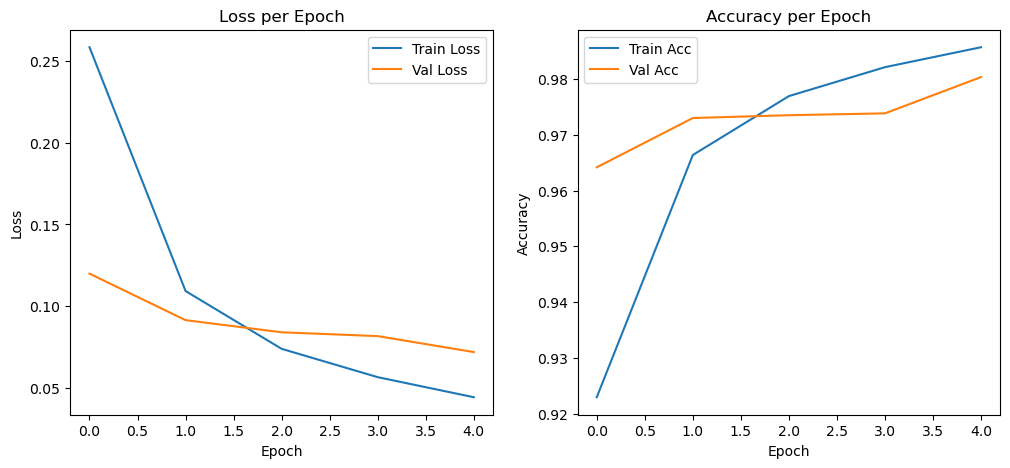

In [9]:
# 5. 학습 곡선 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

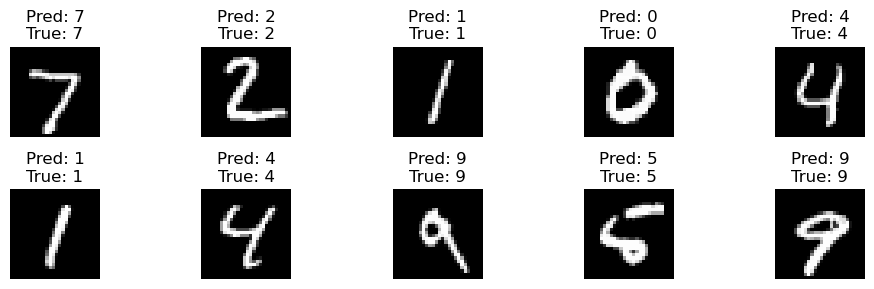

In [10]:
# 이미지 10개 시각화
plt.figure(figsize = (10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap = 'gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

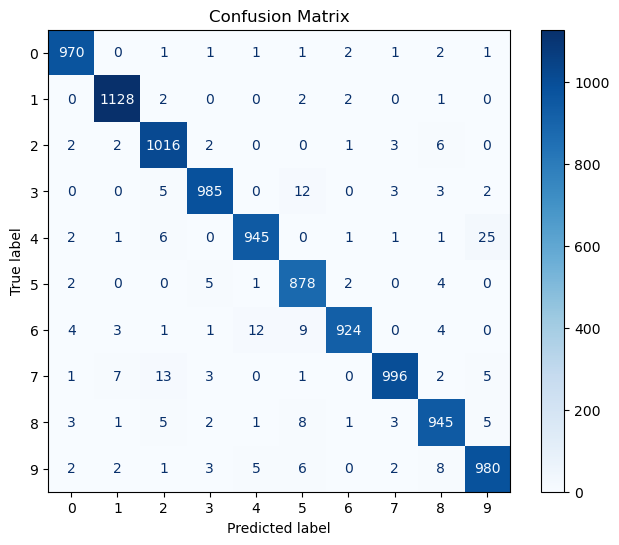

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬 생성
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.metrics import classification_report

# 정밀도, 재현율, F1 점수 출력
print(classification_report(y_test, pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9838    0.9898    0.9868       980
           1     0.9860    0.9938    0.9899      1135
           2     0.9676    0.9845    0.9760      1032
           3     0.9830    0.9752    0.9791      1010
           4     0.9793    0.9623    0.9707       982
           5     0.9575    0.9843    0.9707       892
           6     0.9904    0.9645    0.9773       958
           7     0.9871    0.9689    0.9779      1028
           8     0.9682    0.9702    0.9692       974
           9     0.9627    0.9713    0.9669      1009

    accuracy                         0.9767     10000
   macro avg     0.9766    0.9765    0.9765     10000
weighted avg     0.9768    0.9767    0.9767     10000

